# 00. Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

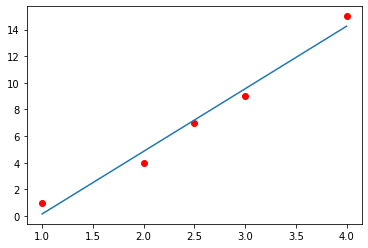

In [3]:
x = [1,2,2.5,3,4]
y = [1,4,7,9,15]
plt.plot(x,y,'ro')
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.show()

In [7]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(dftrain.loc[0],y_train.loc[0])

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [8]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [9]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


<AxesSubplot:>

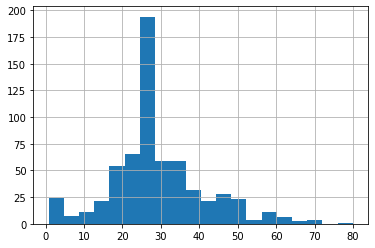

In [10]:
dftrain.age.hist(bins=20)

<AxesSubplot:>

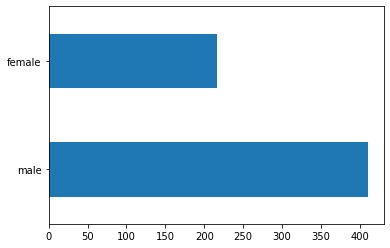

In [12]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

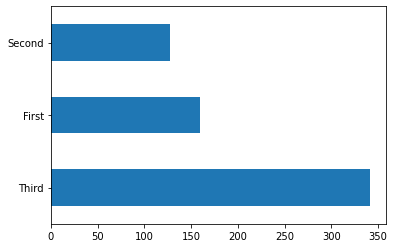

In [13]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survived')

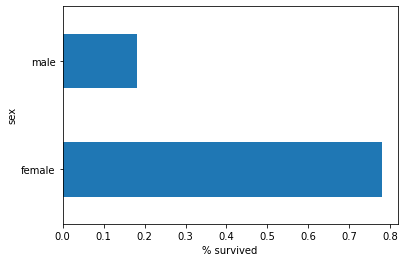

In [15]:
pd.concat([dftrain,y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survived')

In [2]:
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc

In [8]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

categorical_columns = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
numeric_columns = ['age','fare']

feature_columns = []
for feature_name in categorical_columns:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))
    
for feature_name in numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))

In [9]:
dftrain['sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
def make_input_fn(data_df,label_df,num_epochs=10,shuffle=True,batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

In [11]:
train_input_fn = make_input_fn(dftrain,y_train)
eval_input_fn = make_input_fn(dfeval,y_eval,num_epochs=1,shuffle=False)

In [13]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
#Training the model
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)
print(result['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\LOTLOU~1\\AppData\\Local\\Temp\\tmp7294e1oe', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tens

In [14]:
print(result)

{'accuracy': 0.7689394, 'accuracy_baseline': 0.625, 'auc': 0.8344965, 'auc_precision_recall': 0.78572595, 'average_loss': 0.49185926, 'label/mean': 0.375, 'loss': 0.48427922, 'precision': 0.7375, 'prediction/mean': 0.30392244, 'recall': 0.5959596, 'global_step': 200}


In [16]:
result = list(linear_est.predict(eval_input_fn))
print(result)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LOTLOU~1\AppData\Local\Temp\tmp7294e1oe\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'logits': array([-3.0337093], dtype=float32), 'logistic': array([0.04592603], dtype=float32), 'probabilities': array([0.954074  , 0.04592603], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-1.4544451], dtype=float32), 'logistic': array([0.1893184], dtype=float32), 'probabilities': array([0.8106816, 0.1893184], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.01328798], dtype=float32), 'logistic': ar

In [17]:
print(result[0]['probabilities']) #probability of survival

[0.954074   0.04592603]
